# Ratings Prediction

>We have a client who has a website where people write different reviews for technical products. Now they are adding a new feature to their website i.e. The reviewer will have to add stars(rating) as well with the review. The rating is out 5 stars and it only has 5 options available 1 star, 2 stars, 3 stars, 4 stars, 5 stars. Now they want to predict ratings for the reviews which were written in the past and they don't have a rating. So, we have to build an application which can predict the rating by seeing the review.

#### We will start our Analysis in importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import re
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import  stopwords
import string

### Exploratory Data Analysis

importing the csv file which we have scraped the ratting and review details...

In [3]:
df = pd.read_csv("Rattings.csv")
df

,Rattings,Review
0,4,Received this yesterday (04/03/2021). Prompt d...
1,1,Different charger was sent in the box by Amazo...
2,5,Amazing laptop.. I ordered this laptop on its ...
3,4,As soon as I found 11gen Gen i5 at ~62K I got ...
4,5,"I bought this a few days ago, and I am glad I ..."
...,...,...
50588,1,I've been using this router for many years. Ti...
50589,1,GUYS PLEASE PLEASE AVOID THIS ROUTER AT ALL CO...
50590,5,"As others have already said in their reviews, ..."
50591,1,20th Jan 2021 :: I purchased this router on t...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50593 entries, 0 to 50592
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Rattings  50593 non-null  int64 
 1   Review    50588 non-null  object
dtypes: int64(1), object(1)
memory usage: 790.6+ KB


In [5]:
df['length'] = df['Review'].str.len() #we are calculating length of each and every review before cleansing the data.
df

,Rattings,Review,length
0,4,Received this yesterday (04/03/2021). Prompt d...,1661.0
1,1,Different charger was sent in the box by Amazo...,349.0
2,5,Amazing laptop.. I ordered this laptop on its ...,387.0
3,4,As soon as I found 11gen Gen i5 at ~62K I got ...,2470.0
4,5,"I bought this a few days ago, and I am glad I ...",2465.0
...,...,...,...
50588,1,I've been using this router for many years. Ti...,751.0
50589,1,GUYS PLEASE PLEASE AVOID THIS ROUTER AT ALL CO...,852.0
50590,5,"As others have already said in their reviews, ...",577.0
50591,1,20th Jan 2021 :: I purchased this router on t...,493.0


### Data Cleansing.

In [6]:
# Convert all messages to lower case
df['Review'] = df['Review'].str.lower()

In [7]:
# Replace email addresses with 'email'
df['Review'] = df['Review'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

In [8]:
# Replace URLs with 'webaddress'
df['Review'] = df['Review'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

In [9]:
# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
df['Review'] = df['Review'].str.replace(r'£|\$', 'dollers')

In [10]:
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df['Review'] = df['Review'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

In [11]:
# Replace numbers with 'numbr'
df['Review'] = df['Review'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [12]:
df['Review']= df['Review'].astype(str)

In [13]:
df['Review'] = df['Review'].apply(lambda x: ' '.join(term for term in x.split() if term not in string.punctuation))

In [14]:
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
df['Review'] = df['Review'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [15]:
lem=WordNetLemmatizer()
df['Review'] = df['Review'].apply(lambda x: ' '.join(lem.lemmatize(t) for t in x.split()))

In [16]:
df['clean_length'] = df.Review.str.len() # checking the length of the words post cleaning.
df.head()

,Rattings,Review,length,clean_length
0,4,received yesterday (numbr/numbr/numbr). prompt...,1661.0,1309
1,1,different charger sent box amazon ready provid...,349.0,235
2,5,amazing laptop.. ordered laptop released date ...,387.0,305
3,4,soon found numbrgen gen inumbr ~numbrk got stu...,2470.0,1864
4,5,"bought day ago, glad decided make purchase. la...",2465.0,1810


In [17]:
print ('Origian Length', df.length.sum())
print ('Clean Length', df.clean_length.sum())

Origian Length 18423780.0
Clean Length 13286613


### From above we can see that we have cleaned our reviews.

In [18]:
labels = df.Rattings
Text = df.Review

### Preprocessing

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(binary = True)
cv.fit(Text)
x = cv.transform(Text)


In [20]:
x

<50593x35810 sparse matrix of type '<class 'numpy.int64'>'
	with 1545906 stored elements in Compressed Sparse Row format>

In [21]:
y = labels

# Selecting parameters for training

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

accu = 0
for i in range(0,500):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .25, random_state = i)
    mod = LogisticRegression()
    mod.fit(x_train,y_train)
    y_pred = mod.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    if acc> accu:
        accu= acc
        best_rstate=i

print(f"Best Accuracy {accu*100} found on randomstate {best_rstate}")

Best Accuracy 74.6699343821646 found on randomstate 429


In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .25, random_state = best_rstate)

### Selecting the Best model for Training 


In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, cross_validate, cross_val_predict
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier 
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn import metrics
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [25]:
def sort_mod(estimator, x_train, y_train, cv=5, verbose=True):
   
    scoring = {"accuracy": "accuracy",
               "precision": "precision_weighted",
               "recall": "recall_weighted",
               "f1": "f1_weighted"}
    scores = cross_validate(estimator, x_train, y_train, cv=cv, scoring=scoring)
    accuracy, accuracy_std = scores['test_accuracy'].mean(),scores['test_accuracy'].std()
    precision, precision_std = scores['test_precision'].mean(),scores['test_precision'].std()
    recall, recall_std = scores['test_recall'].mean(),scores['test_recall'].std()
    f1, f1_std = scores['test_f1'].mean(),scores['test_f1'].std()

    
    ScoRes = {"Accuracy": accuracy,"Accuracy std": accuracy_std,"Precision": precision,"Precision std": precision_std,
              "Recall": recall,"Recall std": recall_std,"f1": f1,"f1 std": f1_std,}
    
    if verbose:
        print(f"Accuracy: {accuracy} - (std: {accuracy_std})")
        print(f"Precision: {precision} - (std: {precision_std})")
        print(f"Recall: {recall} - (std: {recall_std})")
        print(f"f1: {f1} - (std: {f1_std})")

    return ScoRes



In [26]:
models = [LogisticRegression(), GaussianNB(), RandomForestClassifier(random_state=42),
          DecisionTreeClassifier(random_state=42), ExtraTreeClassifier(random_state=42), 
          AdaBoostClassifier(random_state=42), GradientBoostingClassifier(random_state=42), 
          xgb.XGBClassifier()]

model_names = ["LogisticRegression", "Naive Bayes Gaussian", "Random Forest",
               "Decision Tree", "Extra Tree", "Ada Boost", 
               "Gradient Boosting", "XGBoost"]

In [27]:
accuracy = []
precision = []
recall = []
f1 = []

for model in range(len(models)):
    print(f"\n\nStep {model+1} of {len(models)}")
    print(f"....................................................................running {model_names[model]}")
    
    clf_scores = sort_mod(models[model], x_train, y_train)
    
    accuracy.append(clf_scores["Accuracy"])
    precision.append(clf_scores["Precision"])
    recall.append(clf_scores["Recall"])
    f1.append(clf_scores["f1"])




Step 1 of 8
....................................................................running LogisticRegression
Accuracy: 0.7212469765738261 - (std: 0.003019479773438068)
Precision: 0.704190880110363 - (std: 0.0036936405816000283)
Recall: 0.7212469765738261 - (std: 0.003019479773438068)
f1: 0.7054719672955847 - (std: 0.0037912000078112276)


Step 2 of 8
....................................................................running Naive Bayes Gaussian
Accuracy: nan - (std: nan)
Precision: nan - (std: nan)
Recall: nan - (std: nan)
f1: nan - (std: nan)


Step 3 of 8
....................................................................running Random Forest
Accuracy: 0.7504480481244773 - (std: 0.0023980365427690173)
Precision: 0.7822042131417806 - (std: 0.0038732413078649175)
Recall: 0.7504480481244773 - (std: 0.0023980365427690173)
f1: 0.7239172417245429 - (std: 0.0035705055371792484)


Step 4 of 8
....................................................................running Decision Tree
Accuracy

In [28]:
df_result = pd.DataFrame({"Model": model_names,
                          "accuracy": accuracy,
                          "precision": precision,
                          "recall": recall,
                          "f1": f1})
df_result.sort_values(by="f1", ascending=False)

,Model,accuracy,precision,recall,f1
2,Random Forest,0.750448,0.782204,0.750448,0.723917
0,LogisticRegression,0.721247,0.704191,0.721247,0.705472
3,Decision Tree,0.687566,0.679076,0.687566,0.681945
4,Extra Tree,0.657205,0.649585,0.657205,0.652436
7,XGBoost,0.692521,0.695257,0.692521,0.650717
6,Gradient Boosting,0.621943,0.641040,0.621943,0.549488
5,Ada Boost,0.579380,0.504720,0.579380,0.492523
1,Naive Bayes Gaussian,NaN,NaN,NaN,NaN


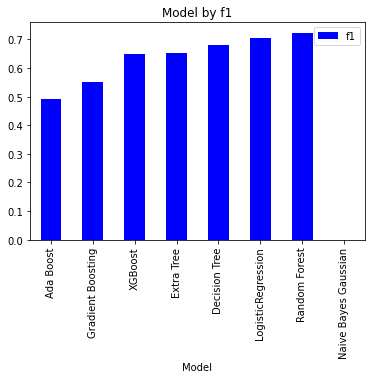

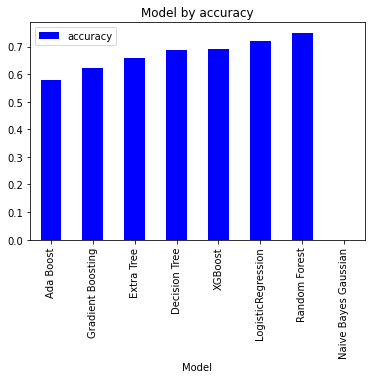

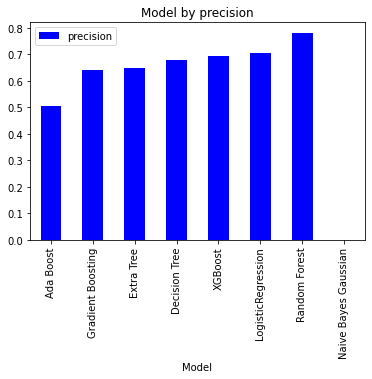

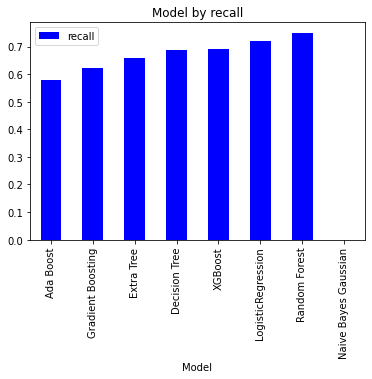

In [29]:
metrics_list = ["f1", "accuracy", "precision", "recall"]

for metric in metrics_list:
    df_result.sort_values(by=metric).plot.bar("Model", metric, color = 'blue')
    plt.title(f"Model by {metric}")
    plt.show()

### Since Random Forest tops the chart with the following metrics we will Hyper tune Random Forest to get better results.
     
        Random Forest
    1. accuracy  = 0.750448
    2. precision = 0.782204
    3. recall    = 0.750448       
    4. f1        = 0.723917

In [30]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [31]:
clf_rf =  RandomForestClassifier(random_state=42)
clf_rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [32]:
y_pred_prob=clf_rf.predict_proba(x_test)
y_pred_prob

array([[0.45, 0.09, 0.09, 0.12, 0.25],
       [0.06, 0.02, 0.7 , 0.07, 0.15],
       [0.03, 0.04, 0.02, 0.14, 0.77],
       ...,
       [0.15, 0.03, 0.07, 0.11, 0.64],
       [0.07, 0.04, 0.  , 0.18, 0.71],
       [0.16, 0.11, 0.13, 0.32, 0.28]])

In [33]:
fpr = {}
tpr = {}
thresh ={}

n_class = 5

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_prob[:,i], pos_label=i)

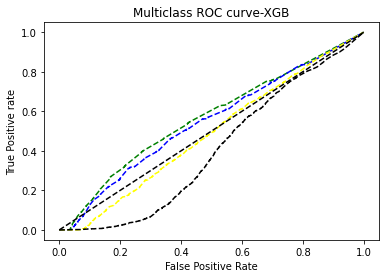

In [34]:
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='black', label='Class 4 vs Rest')

plt.title('Multiclass ROC curve-XGB')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.plot([0,1],[0,1],'k--')
plt.show()

In [35]:
clf_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [36]:
preds = cross_val_predict(clf_rf, x_train, y_train, cv=5, n_jobs=-1)
pd.crosstab(y_train, preds, rownames = ['Real'], colnames =['Predicted'])

Predicted,1,2,3,4,5
Real,,,,,
1,8418,13,33,55,972
2,785,903,13,44,531
3,718,5,1239,119,1348
4,453,9,29,2461,3574
5,499,9,26,234,15454


In [37]:
print(metrics.classification_report(y_train, preds, zero_division=0))

              precision    recall  f1-score   support

           1       0.77      0.89      0.83      9491
           2       0.96      0.40      0.56      2276
           3       0.92      0.36      0.52      3429
           4       0.84      0.38      0.52      6526
           5       0.71      0.95      0.81     16222

    accuracy                           0.75     37944
   macro avg       0.84      0.59      0.65     37944
weighted avg       0.78      0.75      0.72     37944



### HYPERPARAMETER TUNING....

In [38]:
param_grid = [
    {"n_estimators": range(20, 200, 20), 
     "bootstrap": [True, False],
     "criterion": ["gini", "entropy"],   
     "max_depth": [2, 4, 6, 8, 10, 12, 14, None],
     "max_features": ["auto", "sqrt", "log2"], 
     "min_samples_split": [2, 5, 10],
     "min_samples_leaf": [1, 2, 4],
     }
]

clf_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [39]:
clf_random = GridSearchCV(clf_rf, param_grid, cv=3,
                           scoring="f1_weighted", verbose=2, n_jobs=-1)

In [41]:
clf_random.fit(x_train, y_train)

Fitting 3 folds for each of 7776 candidates, totalling 23328 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   29.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 20.0min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 29.4min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 41.9min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 58.8min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 80.9min
[Parallel(n_jobs=-1)]: Done 5824 tasks      | elapsed: 310.0min
[Parallel(n_jobs=-1)]: Done 6837 tasks      | elapsed: 318.4min
[Parallel(n_jobs=-1)]: Done 7930 tasks      | elapsed: 331.2min
[Parallel(n_jobs=-1)]: Done 9105 tasks     

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid=[{'bootstrap': [True, False],
                          'criterion': ['gini', 'entropy'],
                          'max_depth': [2, 4, 6, 8, 10, 12, 14, None],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'min_samples_leaf': [1, 2, 4],
                          'min_samples_split': [2, 5, 10],
                          'n_estimators': range(20, 200, 20)}],
             scoring='f1_weighted', verbose=2)

In [42]:
clf_random.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 140}

In [43]:
clf_random.best_score_

0.7066594681655086

In [45]:
preds = cross_val_predict(clf_random.best_estimator_, x_train, y_train, cv=5, n_jobs=-1)
print(metrics.classification_report(y_train, preds, zero_division=0))

              precision    recall  f1-score   support

           1       0.78      0.89      0.83      9491
           2       0.97      0.40      0.56      2276
           3       0.93      0.36      0.52      3429
           4       0.87      0.37      0.52      6526
           5       0.70      0.96      0.81     16222

    accuracy                           0.75     37944
   macro avg       0.85      0.60      0.65     37944
weighted avg       0.79      0.75      0.73     37944



In [46]:
classifier_final_model = clf_random.best_estimator_
y_pred = classifier_final_model.predict(x_test)
 
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'])

Predicted,1,2,3,4,5
Actual,,,,,
1,2838,1,6,11,293
2,235,326,3,9,171
3,185,0,487,29,371
4,115,1,9,891,1134
5,157,3,8,82,5284


In [47]:
conf_mx = metrics.confusion_matrix(y_test, y_pred)

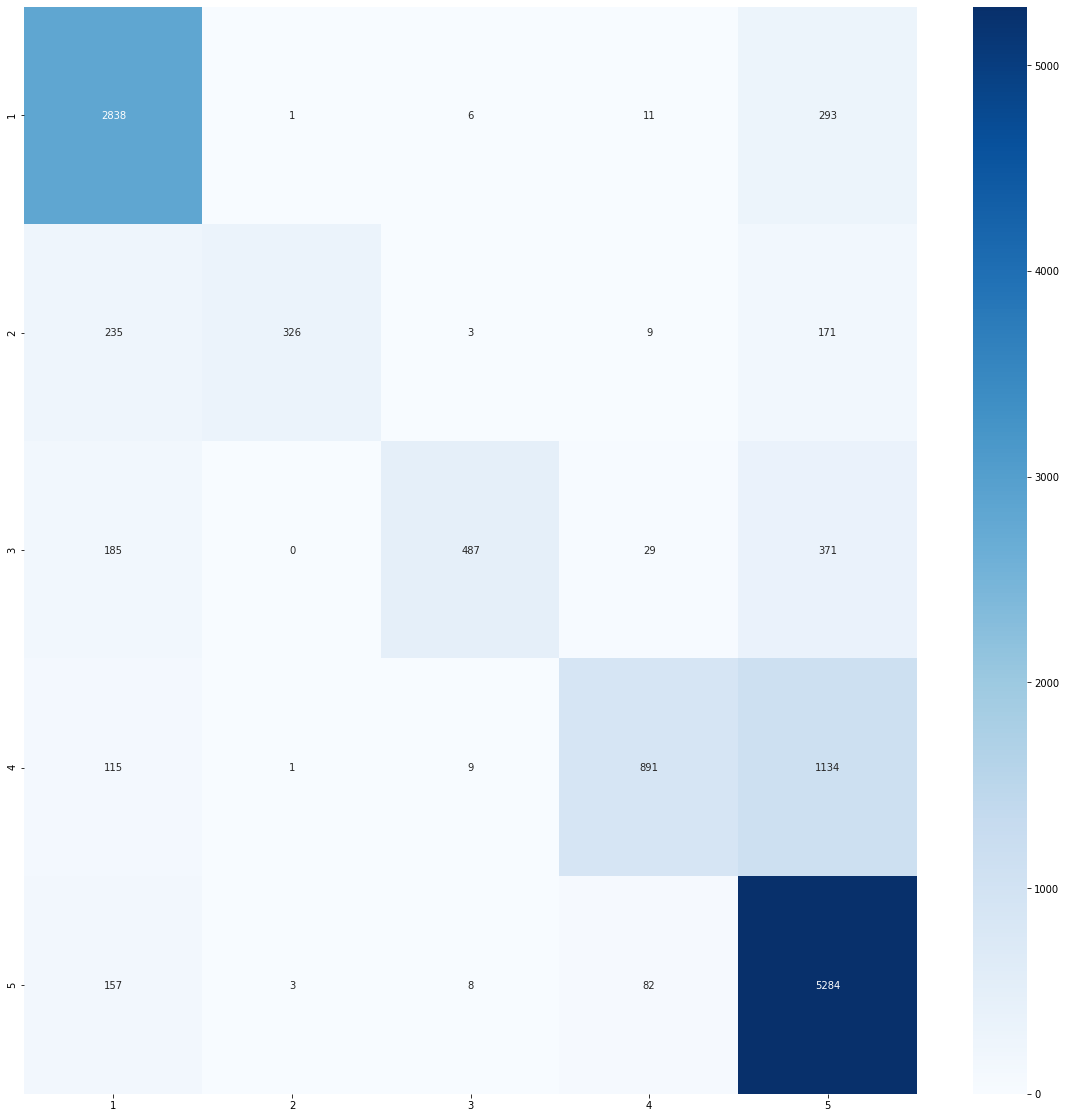

In [48]:
fig = plt.figure(figsize=(20,20))
ax = sns.heatmap(conf_mx, annot=True, fmt="d", 
                 xticklabels=classifier_final_model.classes_,
                 yticklabels=classifier_final_model.classes_,
                cmap= "Blues")

#### Saving the model.

In [49]:
import joblib
joblib.dump(classifier_final_model,"Rattingprediction.obj")

['Rattingprediction.obj']